In [1]:
# import required libraries for dataframe and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

# import required libraries for Hopkins Statistics
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform

# import required libraries for clustering
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import warnings
warnings.simplefilter("ignore")

# Data Exploration

For customer segmentation using RFM method we need Order Date, Quantity, Unit price USD, Customer Key and Order Number- all these fields are available in Sales, Products and Customers tables. Therefore, I have uploaded these three tables and merged them to get the final table for analysis.

In [2]:
import chardet

with open('Customers.csv', 'rb') as f:
  encoding = chardet.detect(f.read())['encoding']

Customerdf = pd.read_csv('Customers.csv', encoding=encoding)

In [3]:
Customerdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15266 entries, 0 to 15265
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CustomerKey  15266 non-null  int64 
 1   Gender       15266 non-null  object
 2   Name         15266 non-null  object
 3   City         15266 non-null  object
 4   State Code   15256 non-null  object
 5   State        15266 non-null  object
 6   Zip Code     15266 non-null  object
 7   Country      15266 non-null  object
 8   Continent    15266 non-null  object
 9   Birthday     15266 non-null  object
dtypes: int64(1), object(9)
memory usage: 1.2+ MB


In [4]:
salesdf = pd.read_csv('Sales.csv')

In [5]:
salesdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62884 entries, 0 to 62883
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Order Number   62884 non-null  int64 
 1   Line Item      62884 non-null  int64 
 2   Order Date     62884 non-null  object
 3   Delivery Date  13165 non-null  object
 4   CustomerKey    62884 non-null  int64 
 5   StoreKey       62884 non-null  int64 
 6   ProductKey     62884 non-null  int64 
 7   Quantity       62884 non-null  int64 
 8   Currency Code  62884 non-null  object
dtypes: int64(6), object(3)
memory usage: 4.3+ MB


In [6]:
salesdf = pd.merge(salesdf, Customerdf, on='CustomerKey', how ='inner')

In [7]:
salesdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62884 entries, 0 to 62883
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Order Number   62884 non-null  int64 
 1   Line Item      62884 non-null  int64 
 2   Order Date     62884 non-null  object
 3   Delivery Date  13165 non-null  object
 4   CustomerKey    62884 non-null  int64 
 5   StoreKey       62884 non-null  int64 
 6   ProductKey     62884 non-null  int64 
 7   Quantity       62884 non-null  int64 
 8   Currency Code  62884 non-null  object
 9   Gender         62884 non-null  object
 10  Name           62884 non-null  object
 11  City           62884 non-null  object
 12  State Code     62854 non-null  object
 13  State          62884 non-null  object
 14  Zip Code       62884 non-null  object
 15  Country        62884 non-null  object
 16  Continent      62884 non-null  object
 17  Birthday       62884 non-null  object
dtypes: int64(6), object(12)
me

In [8]:
productsdf = pd.read_csv('Products.csv')

In [9]:
productsdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ProductKey      2517 non-null   int64 
 1   Product Name    2517 non-null   object
 2   Brand           2517 non-null   object
 3   Color           2517 non-null   object
 4   Unit Cost USD   2517 non-null   object
 5   Unit Price USD  2517 non-null   object
 6   SubcategoryKey  2517 non-null   int64 
 7   Subcategory     2517 non-null   object
 8   CategoryKey     2517 non-null   int64 
 9   Category        2517 non-null   object
dtypes: int64(3), object(7)
memory usage: 196.8+ KB


In [10]:
salesdf = pd.merge(salesdf, productsdf, on='ProductKey', how ='inner')

In [11]:
salesdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62884 entries, 0 to 62883
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Order Number    62884 non-null  int64 
 1   Line Item       62884 non-null  int64 
 2   Order Date      62884 non-null  object
 3   Delivery Date   13165 non-null  object
 4   CustomerKey     62884 non-null  int64 
 5   StoreKey        62884 non-null  int64 
 6   ProductKey      62884 non-null  int64 
 7   Quantity        62884 non-null  int64 
 8   Currency Code   62884 non-null  object
 9   Gender          62884 non-null  object
 10  Name            62884 non-null  object
 11  City            62884 non-null  object
 12  State Code      62854 non-null  object
 13  State           62884 non-null  object
 14  Zip Code        62884 non-null  object
 15  Country         62884 non-null  object
 16  Continent       62884 non-null  object
 17  Birthday        62884 non-null  object
 18  Produc

In [12]:
df = salesdf[['CustomerKey', 'Order Number', 'Order Date', 'Quantity', 'Unit Price USD']]

In [13]:
df

,CustomerKey,Order Number,Order Date,Quantity,Unit Price USD
0,265598,366000,1/1/2016,1,$68.00
1,1599716,378002,1/13/2016,1,$68.00
2,1617106,1673007,7/31/2019,9,$68.00
3,946719,1816030,12/21/2019,1,$68.00
4,1540067,868008,5/17/2017,1,$68.00
...,...,...,...,...,...
62879,1649927,1620046,6/8/2019,2,$29.99
62880,725929,1625031,6/13/2019,2,$79.95
62881,1292476,1632012,6/20/2019,2,$101.99
62882,1811432,1948015,5/1/2020,6,$549.00


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62884 entries, 0 to 62883
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerKey     62884 non-null  int64 
 1   Order Number    62884 non-null  int64 
 2   Order Date      62884 non-null  object
 3   Quantity        62884 non-null  int64 
 4   Unit Price USD  62884 non-null  object
dtypes: int64(3), object(2)
memory usage: 2.4+ MB


Changing the format of the date column

In [15]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%Y')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62884 entries, 0 to 62883
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   CustomerKey     62884 non-null  int64         
 1   Order Number    62884 non-null  int64         
 2   Order Date      62884 non-null  datetime64[ns]
 3   Quantity        62884 non-null  int64         
 4   Unit Price USD  62884 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 2.4+ MB


In [17]:
df


,CustomerKey,Order Number,Order Date,Quantity,Unit Price USD
0,265598,366000,2016-01-01,1,$68.00
1,1599716,378002,2016-01-13,1,$68.00
2,1617106,1673007,2019-07-31,9,$68.00
3,946719,1816030,2019-12-21,1,$68.00
4,1540067,868008,2017-05-17,1,$68.00
...,...,...,...,...,...
62879,1649927,1620046,2019-06-08,2,$29.99
62880,725929,1625031,2019-06-13,2,$79.95
62881,1292476,1632012,2019-06-20,2,$101.99
62882,1811432,1948015,2020-05-01,6,$549.00


Changing the format of the price column

In [18]:
df['Unit Price USD'] = df['Unit Price USD'].str.replace('$', '')

df.head()

,CustomerKey,Order Number,Order Date,Quantity,Unit Price USD
0,265598,366000,2016-01-01,1,68.00
1,1599716,378002,2016-01-13,1,68.00
2,1617106,1673007,2019-07-31,9,68.00
3,946719,1816030,2019-12-21,1,68.00
4,1540067,868008,2017-05-17,1,68.00


In [19]:
df['Unit Price USD'] = df['Unit Price USD'].str.replace(',', '')

df.head()

,CustomerKey,Order Number,Order Date,Quantity,Unit Price USD
0,265598,366000,2016-01-01,1,68.00
1,1599716,378002,2016-01-13,1,68.00
2,1617106,1673007,2019-07-31,9,68.00
3,946719,1816030,2019-12-21,1,68.00
4,1540067,868008,2017-05-17,1,68.00


In [20]:
df['Unit Price USD'] = df['Unit Price USD'].astype(float)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62884 entries, 0 to 62883
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   CustomerKey     62884 non-null  int64         
 1   Order Number    62884 non-null  int64         
 2   Order Date      62884 non-null  datetime64[ns]
 3   Quantity        62884 non-null  int64         
 4   Unit Price USD  62884 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 2.4 MB


In [22]:
df.describe()

,CustomerKey,Order Number,Order Date,Quantity,Unit Price USD
count,6.288400e+04,6.288400e+04,62884,62884.000000,62884.000000
mean,1.180797e+06,1.430905e+06,2018-11-30 21:21:56.939126016,3.144790,280.569848
min,3.010000e+02,3.660000e+05,2016-01-01 00:00:00,1.000000,0.950000
25%,6.808580e+05,1.121017e+06,2018-01-25 00:00:00,1.000000,47.950000
50%,1.261200e+06,1.498016e+06,2019-02-06 00:00:00,2.000000,181.000000
75%,1.686496e+06,1.788010e+06,2019-11-23 00:00:00,4.000000,300.000000
max,2.099937e+06,2.243032e+06,2021-02-20 00:00:00,10.000000,3199.990000
std,5.859634e+05,4.532963e+05,NaN,2.256371,382.827515


Calculating the Recency, Frequency and monetary(amount) fields and merging them together to get the final RFM table for analysis.

In [23]:
df['Amount'] = df['Quantity']*df['Unit Price USD']
df.head()

,CustomerKey,Order Number,Order Date,Quantity,Unit Price USD,Amount
0,265598,366000,2016-01-01,1,68.0,68.0
1,1599716,378002,2016-01-13,1,68.0,68.0
2,1617106,1673007,2019-07-31,9,68.0,612.0
3,946719,1816030,2019-12-21,1,68.0,68.0
4,1540067,868008,2017-05-17,1,68.0,68.0


In [24]:
df_m= df.groupby('CustomerKey').agg({'Amount':"sum"})
df_m = df_m.reset_index()
df_m.head()

,CustomerKey,Amount
0,301,592.00
1,325,5787.67
2,554,951.71
3,1042,1124.91
4,1314,2539.86


In [25]:
df_f = df.groupby('CustomerKey')['Order Number'].count()
df_f = df_f.reset_index()
df_f.columns = ['CustomerKey', 'Frequency']
df_f.head()

,CustomerKey,Frequency
0,301,1
1,325,10
2,554,4
3,1042,3
4,1314,5


In [26]:
df_rfm = pd.merge(df_m, df_f, on= 'CustomerKey', how= 'inner')

df_rfm.head()

,CustomerKey,Amount,Frequency
0,301,592.00,1
1,325,5787.67,10
2,554,951.71,4
3,1042,1124.91,3
4,1314,2539.86,5


In [27]:
df_rfm.describe()

,CustomerKey,Amount,Frequency
count,1.188700e+04,11887.000000,11887.000000
mean,1.110392e+06,4690.458450,5.290149
std,5.991078e+05,5197.622706,3.990147
min,3.010000e+02,1.990000,1.000000
25%,5.749655e+05,1138.915000,2.000000
50%,1.153522e+06,2995.000000,4.000000
75%,1.627821e+06,6425.065000,7.000000
max,2.099937e+06,61871.700000,36.000000


In [28]:
max_date = max(df['Order Date'])
max_date

Timestamp('2021-02-20 00:00:00')

In [29]:
df['date_diff'] = max_date - df['Order Date']

In [30]:
df_R = df.groupby('CustomerKey')['date_diff'].min()
df_R = df_R.reset_index()
df_R.head()

,CustomerKey,date_diff
0,301,467 days
1,325,413 days
2,554,443 days
3,1042,1082 days
4,1314,1159 days


In [31]:
df_R['date_diff'] = df_R['date_diff'].dt.days
df_R.head()

,CustomerKey,date_diff
0,301,467
1,325,413
2,554,443
3,1042,1082
4,1314,1159


In [32]:
df_rfm = pd.merge(df_rfm, df_R, on= 'CustomerKey', how= 'inner')
df_rfm.columns = ['CustomerKey', 'Amount', 'Frequency', 'Recency']
df_rfm

,CustomerKey,Amount,Frequency,Recency
0,301,592.00,1,467
1,325,5787.67,10,413
2,554,951.71,4,443
3,1042,1124.91,3,1082
4,1314,2539.86,5,1159
...,...,...,...,...
11882,2099383,3739.00,6,266
11883,2099600,1270.84,3,927
11884,2099758,529.91,4,255
11885,2099862,501.50,3,416


#Outlier Detection and Removal

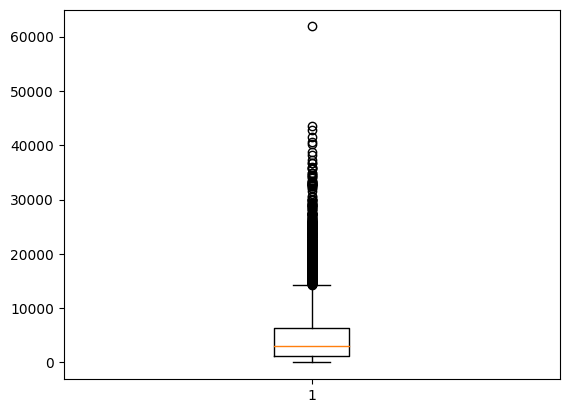

In [33]:
plt.boxplot(df_rfm['Amount'])

plt.show()

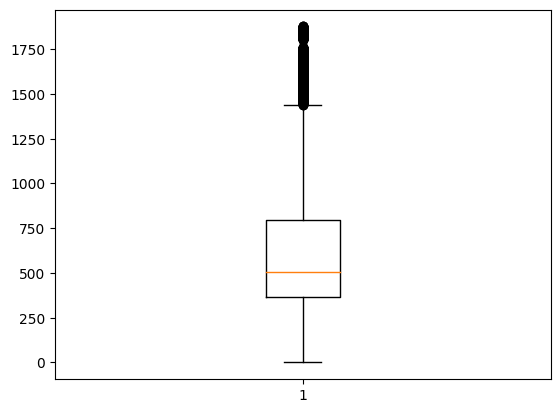

In [34]:
plt.boxplot(df_rfm['Recency']);

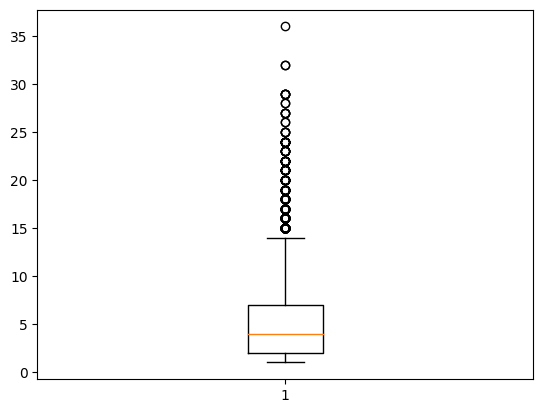

In [35]:
plt.boxplot(df_rfm['Frequency']);

In [36]:
def remove_outliers_iqr(df, column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  return df[(df[column] >= Q1 - 1.5 * IQR) & (df[column] <= Q3 + 1.5 * IQR)]

# Loop through each numeric column and remove outliers
for column in df_rfm.drop('CustomerKey', axis= 1).columns:
    df_rfm = remove_outliers_iqr(df_rfm, column)


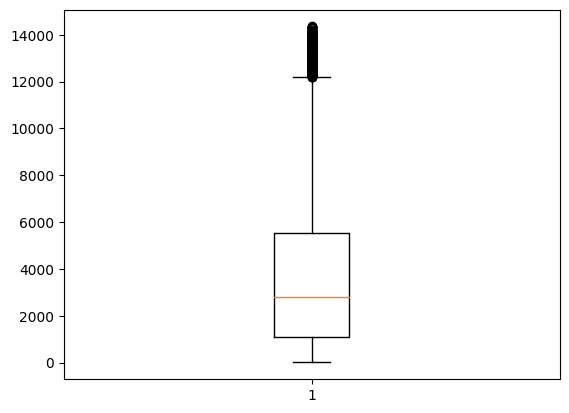

In [37]:
plt.boxplot(df_rfm['Amount'])
plt.show()

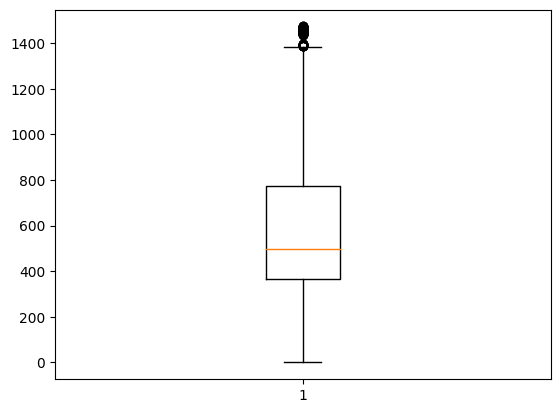

In [38]:
plt.boxplot(df_rfm['Recency']);

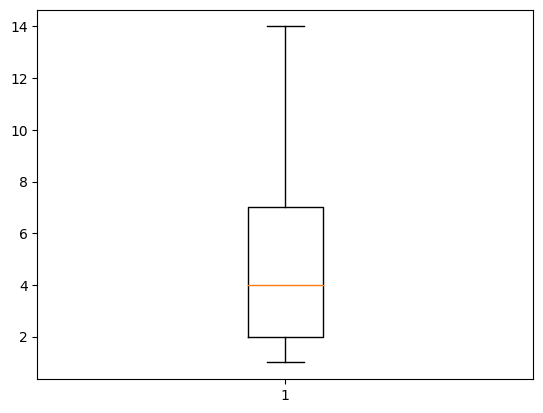

In [39]:
plt.boxplot(df_rfm['Frequency']);

In [40]:
df_rfm

,CustomerKey,Amount,Frequency,Recency
0,301,592.00,1,467
1,325,5787.67,10,413
2,554,951.71,4,443
3,1042,1124.91,3,1082
4,1314,2539.86,5,1159
...,...,...,...,...
11882,2099383,3739.00,6,266
11883,2099600,1270.84,3,927
11884,2099758,529.91,4,255
11885,2099862,501.50,3,416


#Scaling

In [41]:
rfm = df_rfm[['Amount', 'Frequency', 'Recency']]
scaler = MinMaxScaler()
scaled_rfm = scaler.fit_transform(rfm)

In [42]:
X = pd.DataFrame(scaled_rfm)
X.columns = ['Amount', 'Frequency', 'Recency']
X

,Amount,Frequency,Recency
0,0.041115,0.000000,0.317040
1,0.403179,0.692308,0.280380
2,0.066182,0.230769,0.300747
3,0.078251,0.153846,0.734555
4,0.176853,0.307692,0.786830
...,...,...,...
10341,0.260416,0.384615,0.180584
10342,0.088421,0.153846,0.629328
10343,0.036788,0.230769,0.173116
10344,0.034809,0.153846,0.282417


#Hopkins statistics for checking clustering tendency

In [43]:
def hopkins_statistic(X):

    X=X.values  #convert dataframe to a numpy array
    sample_size = int(X.shape[0]*0.05) #0.05 (5%) based on paper by Lawson and Jures


    #a uniform random sample in the original data space
    X_uniform_random_sample = uniform(X.min(axis=0), X.max(axis=0) ,(sample_size , X.shape[1]))



    #a random sample of size sample_size from the original data X
    random_indices=sample(range(0, X.shape[0], 1), sample_size)
    X_sample = X[random_indices]


    #initialise unsupervised learner for implementing neighbor searches
    neigh = NearestNeighbors(n_neighbors=2)
    nbrs=neigh.fit(X)

    #u_distances = nearest neighbour distances from uniform random sample
    u_distances , u_indices = nbrs.kneighbors(X_uniform_random_sample , n_neighbors=2)
    u_distances = u_distances[: , 0] #distance to the first (nearest) neighbour

    #w_distances = nearest neighbour distances from a sample of points from original data X
    w_distances , w_indices = nbrs.kneighbors(X_sample , n_neighbors=2)
    #distance to the second nearest neighbour (as the first neighbour will be the point itself, with distance = 0)
    w_distances = w_distances[: , 1]



    u_sum = np.sum(u_distances)
    w_sum = np.sum(w_distances)

    #compute and return hopkins' statistic
    H = u_sum/ (u_sum + w_sum)
    return H

In [44]:
H=hopkins_statistic(X)
print(H)

0.8262895512915582


In [45]:
l = [] #list to hold values for each call
for i in range(20):
    H=hopkins_statistic(X)
    l.append(H)
#print average value:
np.mean(l)

0.8213842909231607

#Elbow curve and Silhouette Analysis for optimal number of cluster detection

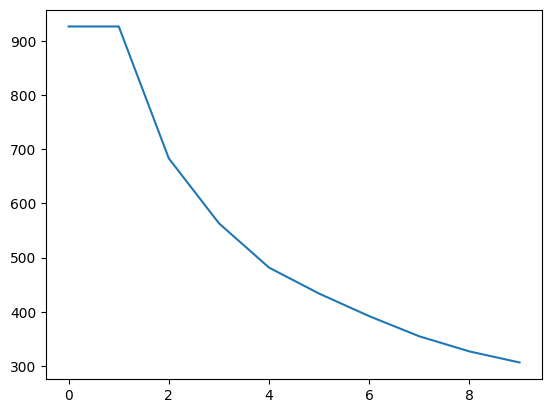

In [46]:
# Elbow-curve/SSD
import warnings
warnings.filterwarnings('ignore')

ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(X)

    ssd.append(kmeans.inertia_)

ssd.insert(0,ssd[0])
plt.plot(ssd)
plt.show()

In [47]:
# Silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for num_clusters in range_n_clusters:

    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(X)

    cluster_labels = kmeans.labels_

    # silhouette score
    silhouette_avg = silhouette_score(scaled_rfm, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.3985491629793876
For n_clusters=3, the silhouette score is 0.33720588549228725
For n_clusters=4, the silhouette score is 0.3045052646120698
For n_clusters=5, the silhouette score is 0.313369644190287
For n_clusters=6, the silhouette score is 0.30813788937918224
For n_clusters=7, the silhouette score is 0.2749386490435738
For n_clusters=8, the silhouette score is 0.27091739673273013
For n_clusters=9, the silhouette score is 0.273244548254726
For n_clusters=10, the silhouette score is 0.2724124288189355


#K-means Clustering

In [48]:
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(X)

KMeans(max_iter=50, n_clusters=3)

In [49]:
df_rfm['Cluster_Id'] = kmeans.labels_
labels = df_rfm['Cluster_Id']
df_rfm.head()

,CustomerKey,Amount,Frequency,Recency,Cluster_Id
0,301,592.00,1,467,2
1,325,5787.67,10,413,0
2,554,951.71,4,443,2
3,1042,1124.91,3,1082,1
4,1314,2539.86,5,1159,1


In [50]:
centroids = kmeans.cluster_centers_

In [51]:
centroids

array([[0.52739508, 0.57599105, 0.2983653 ],
       [0.15408664, 0.15340375, 0.65564318],
       [0.14304432, 0.18605091, 0.26944036]])

#Data Visualization

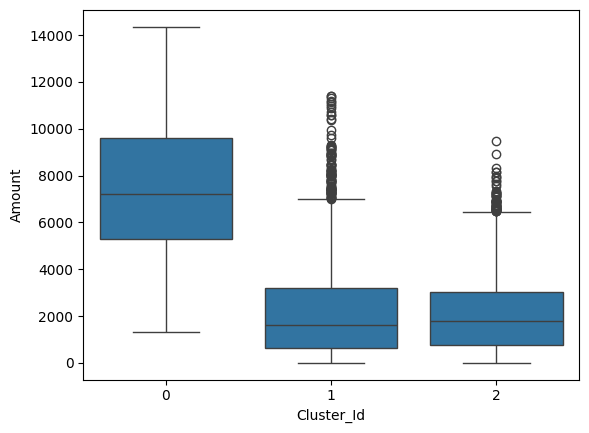

In [52]:
sns.boxplot(x='Cluster_Id', y='Amount', data=df_rfm)
plt.show()

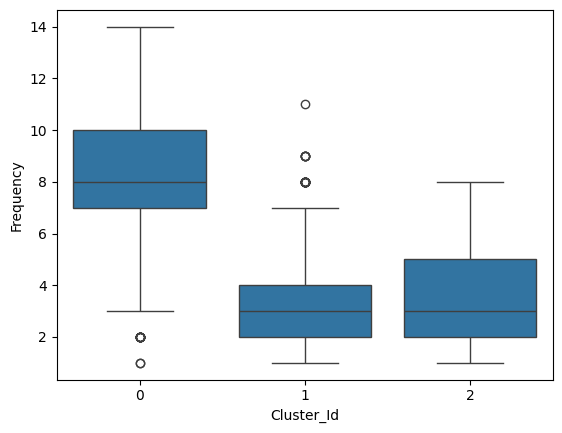

In [53]:
sns.boxplot(x='Cluster_Id', y='Frequency', data=df_rfm)
plt.show()

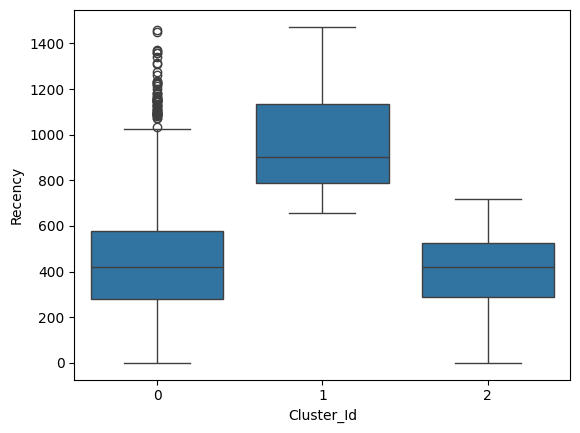

In [54]:
sns.boxplot(x='Cluster_Id', y='Recency', data=df_rfm)
plt.show()

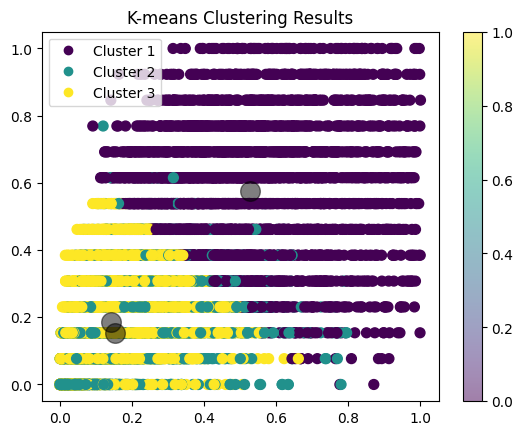

In [55]:
scatter = plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, s=50, cmap='viridis')

plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=200, alpha=0.5)
plt.legend(handles=scatter.legend_elements()[0], labels=['Cluster 1', 'Cluster 2', 'Cluster 3'])

plt.title('K-means Clustering Results')
plt.colorbar()

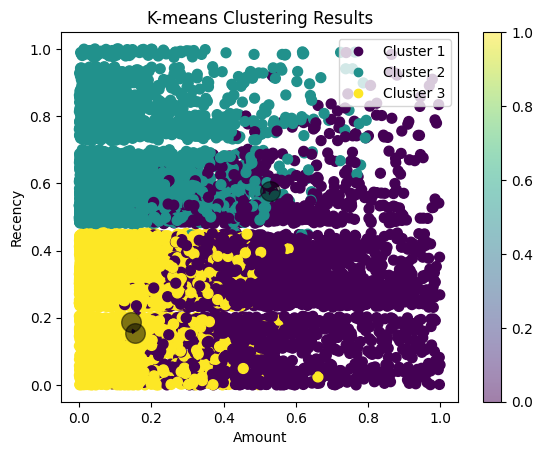

In [56]:
scatter = plt.scatter(X.iloc[:, 0], X.iloc[:, 2], c=labels, s=50, cmap='viridis')

plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=200, alpha=0.5)
plt.legend(handles=scatter.legend_elements()[0], labels=['Cluster 1', 'Cluster 2', 'Cluster 3'])

plt.title('K-means Clustering Results')
plt.xlabel('Amount')
plt.ylabel('Recency')
plt.colorbar()